# **NLP MINI PROJECT**

1.   Akshay Gurnani 22
2.   Deepak Rajani  53
3.   Piyush Batheja 70



Mounted at /content/drive


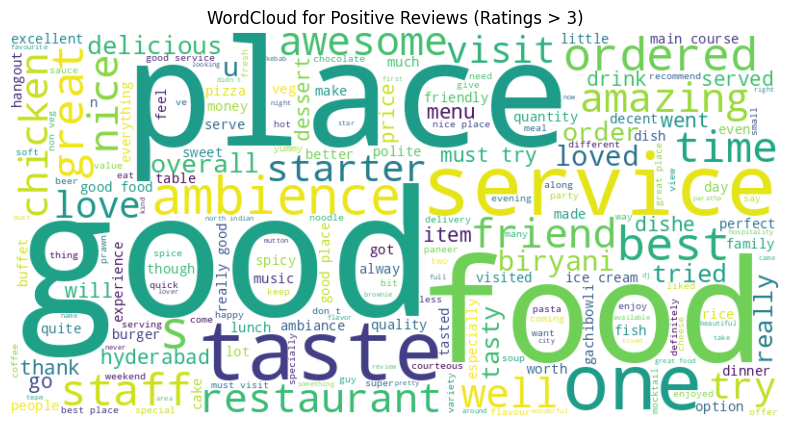

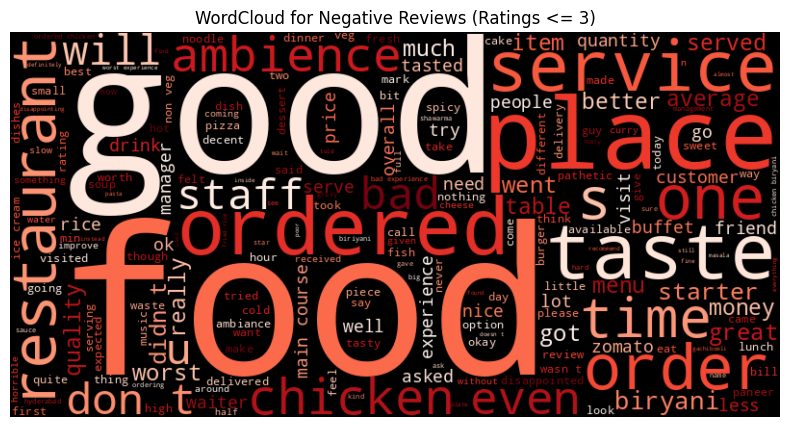

Mean Squared Error: 1.2255131732065996
Predicted Rating for the review: 3.6883395904768865
Mean Squared Error: 0.9840358398758675
Predicted Rating for the review: 'Food was good but service was bad.' is: 2.3
Enter a restaurant review: food was not ad
Predicted Rating: 3.1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Mean Squared Error: 0.7508670001476979
R^2 Score: 0.6576248402326257
Enter a restaurant review: food was not bad


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[nltk_data] Downloading package punkt to /root/nltk_data...


Predicted Rating: 2.66


[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Import necessary libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
!pip install wordcloud
from wordcloud import WordCloud
df = pd.read_csv('/content/drive/MyDrive/Restaurant-reviews.csv')
# Preview the data
df.head()

# Preprocess text function
def preprocess_text(text):
    if isinstance(text, str):
        # Remove non-alphabet characters and convert to lowercase
        text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=text).lower()
        return text
    else:
        return ""

# Apply text preprocessing
df['Processed_Text'] = df['Review'].apply(preprocess_text)

# Handle missing values for the target column (Rating)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  # Ensure numeric ratings
df.dropna(subset=['Rating'], inplace=True)  # Drop rows where Rating is NaN


# 2. WordCloud for Positive Reviews (Ratings > 3)
positive_reviews = ' '.join(df[df['Rating'] > 3]['Processed_Text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Reviews (Ratings > 3)')
plt.show()

# 3. WordCloud for Negative Reviews (Ratings <= 3)
negative_reviews = ' '.join(df[df['Rating'] <= 3]['Processed_Text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Reviews (Ratings <= 3)')
plt.show()

# Feature Extraction using CountVectorizer
vectorizer = CountVectorizer(max_features=2000, stop_words='english')
X_vectorized = vectorizer.fit_transform(df['Processed_Text'])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, df['Rating'], test_size=0.2, random_state=42)

# Model Building: RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
regressor.fit(X_train, y_train)

# Model Evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Compare predictions with actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()

# Predict rating based on user input
def predict_rating(review_text):
    review_processed = preprocess_text(review_text)
    review_vectorized = vectorizer.transform([review_processed]).toarray()
    predicted_rating = regressor.predict(review_vectorized)[0]
    return predicted_rating

# Example usage of predicting a new review
new_review = "The food was delicious and the service was excellent!"
predicted_rating = predict_rating(new_review)
print(f"Predicted Rating for the review: {predicted_rating}")

# Import necessary libraries
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Use Linear Regression
from sklearn.metrics import mean_squared_error


# Preprocess text function to clean reviews
def preprocess_text(text):
    if isinstance(text, str):
        # Remove non-alphabet characters and convert to lowercase
        text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=text).lower()
        return text
    else:
        return ""

# Apply text preprocessing
df['Processed_Text'] = df['Review'].apply(preprocess_text)

# Ensure the 'Rating' column is numeric and drop missing ratings
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.dropna(subset=['Rating'], inplace=True)

# Feature Extraction using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=2000, stop_words='english')
X_vectorized = vectorizer.fit_transform(df['Processed_Text'])

# Target variable (Rating, treated as continuous)
y = df['Rating']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Model: Using Linear Regression to predict ratings
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation: Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Function to predict the rating based on user input review
def predict_review_rating(review_text):
    review_processed = preprocess_text(review_text)
    review_vectorized = vectorizer.transform([review_processed])
    predicted_rating = model.predict(review_vectorized)[0]  # Get the first result
    return round(predicted_rating, 1)  # Round the result to 1 decimal place

# Test prediction for an example review
new_review = "Food was good but service was bad."
predicted_rating = predict_review_rating(new_review)
print(f"Predicted Rating for the review: '{new_review}' is: {predicted_rating}")

# You can also allow user input in a cell
user_review = input("Enter a restaurant review: ")
predicted_rating = predict_review_rating(user_review)
print(f"Predicted Rating: {predicted_rating}")
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import gensim
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
import joblib

# Check for non-numeric values in 'Rating' and convert them to NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with NaN values in 'Rating'
df = df.dropna(subset=['Rating'])

# Preprocess text function
def preprocess_text(text):
    if isinstance(text, str):
        # Remove non-alphabet characters and convert to lowercase
        text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=text).lower()

        # Tokenize and remove stopwords
        tokens = text.split()
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize the words
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        return tokens  # Return tokens for Word2Vec
    else:
        return []

# Apply text preprocessing
df['Processed_Text'] = df['Review'].apply(preprocess_text)

# Ensure 'Review' is a string to avoid errors
df['Review'] = df['Review'].astype(str)

# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Ensure no NaN values in ratings
df.loc[df['Rating'].isnull(), 'Rating'] = 0

# Prepare features
X = df['Processed_Text']
X_sentiment = df['Sentiment']
y = df['Rating']

# Train Word2Vec model
word2vec_model = gensim.models.Word2Vec(X, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert reviews to Word2Vec embeddings
def review_to_vector(review):
    words = review
    word_vectors = []
    for word in words:
        if word in word2vec_model.wv:
            word_vectors.append(word2vec_model.wv[word])
    return sum(word_vectors) / len(word_vectors) if word_vectors else [0]*100  # Return mean vector

# Convert reviews to vectors
X_vectors = [review_to_vector(review) for review in X]

# Create a DataFrame for features
X_vectors_df = pd.DataFrame(X_vectors)

# Add the Sentiment score as a feature
X_vectors_df['Sentiment'] = X_sentiment.values

# Ensure all features are float
X_vectors_df = X_vectors_df.astype(float)

# Ensure all column names and the index are strings
X_vectors_df.columns = X_vectors_df.columns.astype(str)
X_vectors_df.index = X_vectors_df.index.astype(str)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectors_df, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
joblib.dump(regressor, 'random_forest_model.pkl')

# Make predictions and evaluate the model
y_pred = regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Function to predict rating for a new review
def predict_rating(review_text):
    processed_review = preprocess_text(review_text)
    review_vector = review_to_vector(processed_review)
    sentiment_score = sia.polarity_scores(review_text)['compound']

    # Prepare input for prediction
    input_features = pd.DataFrame([[*review_vector, sentiment_score]])
    input_features = input_features.astype(float)  # Ensure input features are float
    predicted_rating = regressor.predict(input_features)
    return predicted_rating[0]

# Test the model with an example review
new_review = input("Enter a restaurant review: ")
predicted_rating = predict_rating(new_review)
print(f"Predicted Rating: {predicted_rating:.2f}")  # Format the output to two decimal places

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict
import math
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils.validation import check_is_fitted

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing Function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [re.sub(r'[^a-z]', '', token) for token in tokens]
        tokens = [word for word in tokens if word.isalpha()]
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []

# TF-IDF Functions
def compute_tf(tokenized_review):
    tf = defaultdict(int)
    for word in tokenized_review:
        tf[word] += 1
    total_words = len(tokenized_review)
    for word in tf:
        tf[word] /= total_words
    return tf

def compute_idf(corpus):
    N = len(corpus)
    idf = defaultdict(int)
    for review in corpus:
        unique_words = set(review)
        for word in unique_words:
            idf[word] += 1
    for word in idf:
        idf[word] = math.log(N / (1 + idf[word]))  # Added 1 to avoid division by zero
    return idf

def compute_tfidf(tokenized_review, idf):
    tf = compute_tf(tokenized_review)
    tfidf = {}
    for word in tf:
        tfidf[word] = tf[word] * idf.get(word, 0.0)
    return tfidf

def tfidf_to_vector(tfidf_dict, vocabulary):
    vector = np.zeros(len(vocabulary))
    word_index = {word: idx for idx, word in enumerate(vocabulary)}
    for word, score in tfidf_dict.items():
        if word in word_index:
            vector[word_index[word]] = score
    return vector

# Function to add bias
def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.hstack((bias, X))

# Ridge Regression
def linear_regression_ridge(X, y, alpha=1.0):
    X_transpose = X.T
    identity_matrix = np.identity(X.shape[1])
    beta = np.linalg.inv(X_transpose.dot(X) + alpha * identity_matrix).dot(X_transpose).dot(y)
    return beta

# Manual Bayesian Regression
def bayesian_linear_regression(X, y, sigma_prior=1.0, sigma_likelihood=1.0):
    X_transpose = X.T
    posterior_cov = np.linalg.inv((X_transpose.dot(X) / sigma_likelihood) + (np.identity(X.shape[1]) / sigma_prior))
    posterior_mean = posterior_cov.dot(X_transpose).dot(y) / sigma_likelihood
    return posterior_mean, posterior_cov

# Function to preprocess a new review
def preprocess_new_review(review, vocabulary, idf):
    tokens = preprocess_text(review)
    tfidf = compute_tfidf(tokens, idf)
    vector = tfidf_to_vector(tfidf, vocabulary)
    return vector

# Prediction Function
def predict_new_review(review, vocabulary, idf, beta_linear, beta_bayesian):
    vector = preprocess_new_review(review, vocabulary, idf)
    vector_bias = np.insert(vector, 0, 1.0)  # Insert 1 for bias
    pred_linear = vector_bias.dot(beta_linear)
    pred_bayesian = vector_bias.dot(beta_bayesian)
    return pred_linear, pred_bayesian

# Preprocess reviews
df['Processed_Text'] = df['Review'].apply(preprocess_text)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.dropna(subset=['Rating'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Compute IDF and TF-IDF Matrix
idf = compute_idf(df['Processed_Text'])
vocabulary = sorted(list(set(word for review in df['Processed_Text'] for word in review)))
tfidf_vectors = df['Processed_Text'].apply(lambda x: compute_tfidf(x, idf))
tfidf_matrix = np.array([tfidf_to_vector(tfidf, vocabulary) for tfidf in tfidf_vectors])

# Split Data
X = tfidf_matrix
y = df['Rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias to the feature matrix
X_train_bias = add_bias(X_train)
X_test_bias = add_bias(X_test)

# Train Ridge Regression model (beta_linear)
alpha = 0.1  # Regularization strength
beta_linear = linear_regression_ridge(X_train_bias, y_train, alpha)

# Train Bayesian Regression model (beta_bayesian)
sigma_prior = 1.0
sigma_likelihood = 1.0
beta_bayesian, _ = bayesian_linear_regression(X_train_bias, y_train, sigma_prior, sigma_likelihood)

# Example User Input
user_review = input("Enter a restaurant review: ")

# Make predictions for the new review
pred_linear, pred_bayesian = predict_new_review(
    user_review,
    vocabulary,
    idf,
    beta_linear,     # Linear Ridge Regression coefficients
    beta_bayesian    # Bayesian regression coefficients
)

print(f"Predicted Rating (Manual Linear Regression - Ridge): {pred_linear:.2f}")
print(f"Predicted Rating (Manual Bayesian Regression): {pred_bayesian:.2f}")


In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import gensim
import nltk


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

In [ ]:
import joblib

# Check for non-numeric values in 'Rating' and convert them to NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with NaN values in 'Rating'
df = df.dropna(subset=['Rating'])

# Preprocess text function
def preprocess_text(text):
    if isinstance(text, str):
        # Remove non-alphabet characters and convert to lowercase
        text = re.sub(pattern='[^a-zA-Z]', repl=' ', string=text).lower()

        # Tokenize and remove stopwords
        tokens = text.split()
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize the words
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        return tokens  # Return tokens for Word2Vec
    else:
        return []

# Apply text preprocessing
df['Processed_Text'] = df['Review'].apply(preprocess_text)

# Ensure 'Review' is a string to avoid errors
df['Review'] = df['Review'].astype(str)

# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Ensure no NaN values in ratings
df.loc[df['Rating'].isnull(), 'Rating'] = 0

# Prepare features
X = df['Processed_Text']
X_sentiment = df['Sentiment']
y = df['Rating']

# Train Word2Vec model
word2vec_model = gensim.models.Word2Vec(X, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert reviews to Word2Vec embeddings
def review_to_vector(review):
    words = review
    word_vectors = []
    for word in words:
        if word in word2vec_model.wv:
            word_vectors.append(word2vec_model.wv[word])
    return sum(word_vectors) / len(word_vectors) if word_vectors else [0]*100  # Return mean vector

# Convert reviews to vectors
X_vectors = [review_to_vector(review) for review in X]

# Create a DataFrame for features
X_vectors_df = pd.DataFrame(X_vectors)

# Add the Sentiment score as a feature
X_vectors_df['Sentiment'] = X_sentiment.values

# Ensure all features are float
X_vectors_df = X_vectors_df.astype(float)

# Ensure all column names and the index are strings
X_vectors_df.columns = X_vectors_df.columns.astype(str)
X_vectors_df.index = X_vectors_df.index.astype(str)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectors_df, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
joblib.dump(regressor, 'random_forest_model.pkl')

# Make predictions and evaluate the model
y_pred = regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Function to predict rating for a new review
def predict_rating(review_text):
    processed_review = preprocess_text(review_text)
    review_vector = review_to_vector(processed_review)
    sentiment_score = sia.polarity_scores(review_text)['compound']

    # Prepare input for prediction
    input_features = pd.DataFrame([[*review_vector, sentiment_score]])
    input_features = input_features.astype(float)  # Ensure input features are float
    predicted_rating = regressor.predict(input_features)
    return predicted_rating[0]




In [ ]:
# Test the model with an example review
new_review = input("Enter a restaurant review: ")
predicted_rating = predict_rating(new_review)
print(f"Predicted Rating: {predicted_rating:.2f}")  # Format the output to two decimal places

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict
import math
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils.validation import check_is_fitted

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing Function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        tokens = word_tokenize(text)
        tokens = [re.sub(r'[^a-z]', '', token) for token in tokens]
        tokens = [word for word in tokens if word.isalpha()]
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []

# TF-IDF Functions
def compute_tf(tokenized_review):
    tf = defaultdict(int)
    for word in tokenized_review:
        tf[word] += 1
    total_words = len(tokenized_review)
    for word in tf:
        tf[word] /= total_words
    return tf

def compute_idf(corpus):
    N = len(corpus)
    idf = defaultdict(int)
    for review in corpus:
        unique_words = set(review)
        for word in unique_words:
            idf[word] += 1
    for word in idf:
        idf[word] = math.log(N / (1 + idf[word]))  # Added 1 to avoid division by zero
    return idf

def compute_tfidf(tokenized_review, idf):
    tf = compute_tf(tokenized_review)
    tfidf = {}
    for word in tf:
        tfidf[word] = tf[word] * idf.get(word, 0.0)
    return tfidf

def tfidf_to_vector(tfidf_dict, vocabulary):
    vector = np.zeros(len(vocabulary))
    word_index = {word: idx for idx, word in enumerate(vocabulary)}
    for word, score in tfidf_dict.items():
        if word in word_index:
            vector[word_index[word]] = score
    return vector

# Function to add bias
def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.hstack((bias, X))

# Ridge Regression
def linear_regression_ridge(X, y, alpha=1.0):
    X_transpose = X.T
    identity_matrix = np.identity(X.shape[1])
    beta = np.linalg.inv(X_transpose.dot(X) + alpha * identity_matrix).dot(X_transpose).dot(y)
    return beta

# Manual Bayesian Regression
def bayesian_linear_regression(X, y, sigma_prior=1.0, sigma_likelihood=1.0):
    X_transpose = X.T
    posterior_cov = np.linalg.inv((X_transpose.dot(X) / sigma_likelihood) + (np.identity(X.shape[1]) / sigma_prior))
    posterior_mean = posterior_cov.dot(X_transpose).dot(y) / sigma_likelihood
    return posterior_mean, posterior_cov

# Function to preprocess a new review
def preprocess_new_review(review, vocabulary, idf):
    tokens = preprocess_text(review)
    tfidf = compute_tfidf(tokens, idf)
    vector = tfidf_to_vector(tfidf, vocabulary)
    return vector

# Prediction Function
def predict_new_review(review, vocabulary, idf, beta_linear, beta_bayesian):
    vector = preprocess_new_review(review, vocabulary, idf)
    vector_bias = np.insert(vector, 0, 1.0)  # Insert 1 for bias
    pred_linear = vector_bias.dot(beta_linear)
    pred_bayesian = vector_bias.dot(beta_bayesian)
    return pred_linear, pred_bayesian

# Preprocess reviews
df['Processed_Text'] = df['Review'].apply(preprocess_text)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.dropna(subset=['Rating'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Compute IDF and TF-IDF Matrix
idf = compute_idf(df['Processed_Text'])
vocabulary = sorted(list(set(word for review in df['Processed_Text'] for word in review)))
tfidf_vectors = df['Processed_Text'].apply(lambda x: compute_tfidf(x, idf))
tfidf_matrix = np.array([tfidf_to_vector(tfidf, vocabulary) for tfidf in tfidf_vectors])

# Split Data
X = tfidf_matrix
y = df['Rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias to the feature matrix
X_train_bias = add_bias(X_train)
X_test_bias = add_bias(X_test)

# Train Ridge Regression model (beta_linear)
alpha = 0.1  # Regularization strength
beta_linear = linear_regression_ridge(X_train_bias, y_train, alpha)

# Train Bayesian Regression model (beta_bayesian)
sigma_prior = 1.0
sigma_likelihood = 1.0
beta_bayesian, _ = bayesian_linear_regression(X_train_bias, y_train, sigma_prior, sigma_likelihood)




In [ ]:
# Example User Input
user_review = input("Enter a restaurant review: ")

# Make predictions for the new review
pred_linear, pred_bayesian = predict_new_review(
    user_review,
    vocabulary,
    idf,
    beta_linear,     # Linear Ridge Regression coefficients
    beta_bayesian    # Bayesian regression coefficients
)

print(f"Predicted Rating (Manual Linear Regression - Ridge): {pred_linear:.2f}")
print(f"Predicted Rating (Manual Bayesian Regression): {pred_bayesian:.2f}")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Function to calculate accuracy based on R^2 score
def calculate_accuracy(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Train Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions for each model
y_pred_rf = rf_model.predict(X_test)
y_pred_linear = X_test_bias.dot(beta_linear)
y_pred_bayesian = X_test_bias.dot(beta_bayesian)

# Calculate accuracies (R^2 score can be used as a proxy for accuracy in regression)
accuracy_rf = calculate_accuracy(y_test, y_pred_rf)
accuracy_linear = calculate_accuracy(y_test, y_pred_linear)
accuracy_bayesian = calculate_accuracy(y_test, y_pred_bayesian)

# Store the accuracies for each model
accuracies = {
    'Random Forest': accuracy_rf,
    'Manual Linear Regression (Ridge)': accuracy_linear,
    'Manual Bayesian Regression': accuracy_bayesian
}

# Create a list of models and their corresponding accuracies
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_values, color=['blue', 'orange', 'purple'])
plt.xlabel("Models")
plt.ylabel("R^2 Score (Accuracy)")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Set the y-axis limits to 0-1 for accuracy
plt.show()

# Print accuracies for clarity
for model, acc in accuracies.items():
    print(f"{model} Accuracy (R^2 Score): {acc:.2f}")
